T7DQ2

What are some potential limitations or assumptions of ANOVA and linear models, and how might these affect the validity of the results? How can these limitations be addressed or mitigated? How can Python be used to develop a useful tool in this context?

Some limitations in a two way ANOVA include the assumptions of normailty, homogeneity of variances and independence of observations. 
normality - the data within each group should be normally distributed
homogeneity of variance - the variance of the data within each group should be equal 
independence - the observations within each group should be independent
Some assumptions of linear regression are linearity, independent and homoscedasticity.
linearity - the relationship between the dependent and independent variable is linear
independence - the observations are independent of each other
homoscedasticity - the variance of the errors is constant across all levels of independent variables. 

Python can be used to develop useful tools in ANOVA  by providing  the f_oneway () function from SciPy library which we can use in order to onduct the one way ANOVA test. As for linear regression python provides sciki-learn , statsmodels and NumPy that could be used to implement the results for linear regression.

GITHUB: https://github.com/FMJM401/DSC510---WEEK-7/tree/main/T7_DQ2

VIDEO: https://www.youtube.com/watch?v=Ql0xqvdxqos

In [1]:
# importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import tukey_hsd
import pingouin as pg
plt.style.use('fivethirtyeight') 

/var/folders/x1/3h80s1d10bx2rgftf2cxmc980000gn/T/ipykernel_11656/1431341344.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ANOVA 

This data set is from kaggle it represents a crop field data 

crop yield farm data anova. (n.d.). Www.kaggle.com. Retrieved March 31, 2024, from https://www.kaggle.com/datasets/jhonculler/fdffa/code

In [2]:
df = pd.read_csv("field_data.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   height      96 non-null     int64  
 1   temp        96 non-null     int64  
 2   humidity    96 non-null     int64  
 3   fertilizer  96 non-null     int64  
 4   yield       96 non-null     float64
 5   region      96 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 4.6 KB


,height,temp,humidity,fertilizer,yield,region
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1.500000,65.156250,70.031250,2.000000,397.015476,2.500000
std,0.502625,3.335071,6.793888,0.820783,0.664548,1.123903
min,1.000000,60.000000,60.000000,1.000000,395.360840,1.000000
25%,1.000000,62.000000,64.750000,1.000000,396.468696,1.750000
50%,1.500000,66.000000,69.000000,2.000000,397.058105,2.500000
75%,2.000000,68.000000,77.000000,3.000000,397.398571,3.250000
max,2.000000,70.000000,80.000000,3.000000,399.060899,4.000000


In [3]:
## create categorical variable for humidity and temp
bin_cols = ['temp', 'humidity']
for c in bin_cols:
    df[f'{c}_bins'] = pd.cut(df[c], bins=3, labels=[1,2,3])

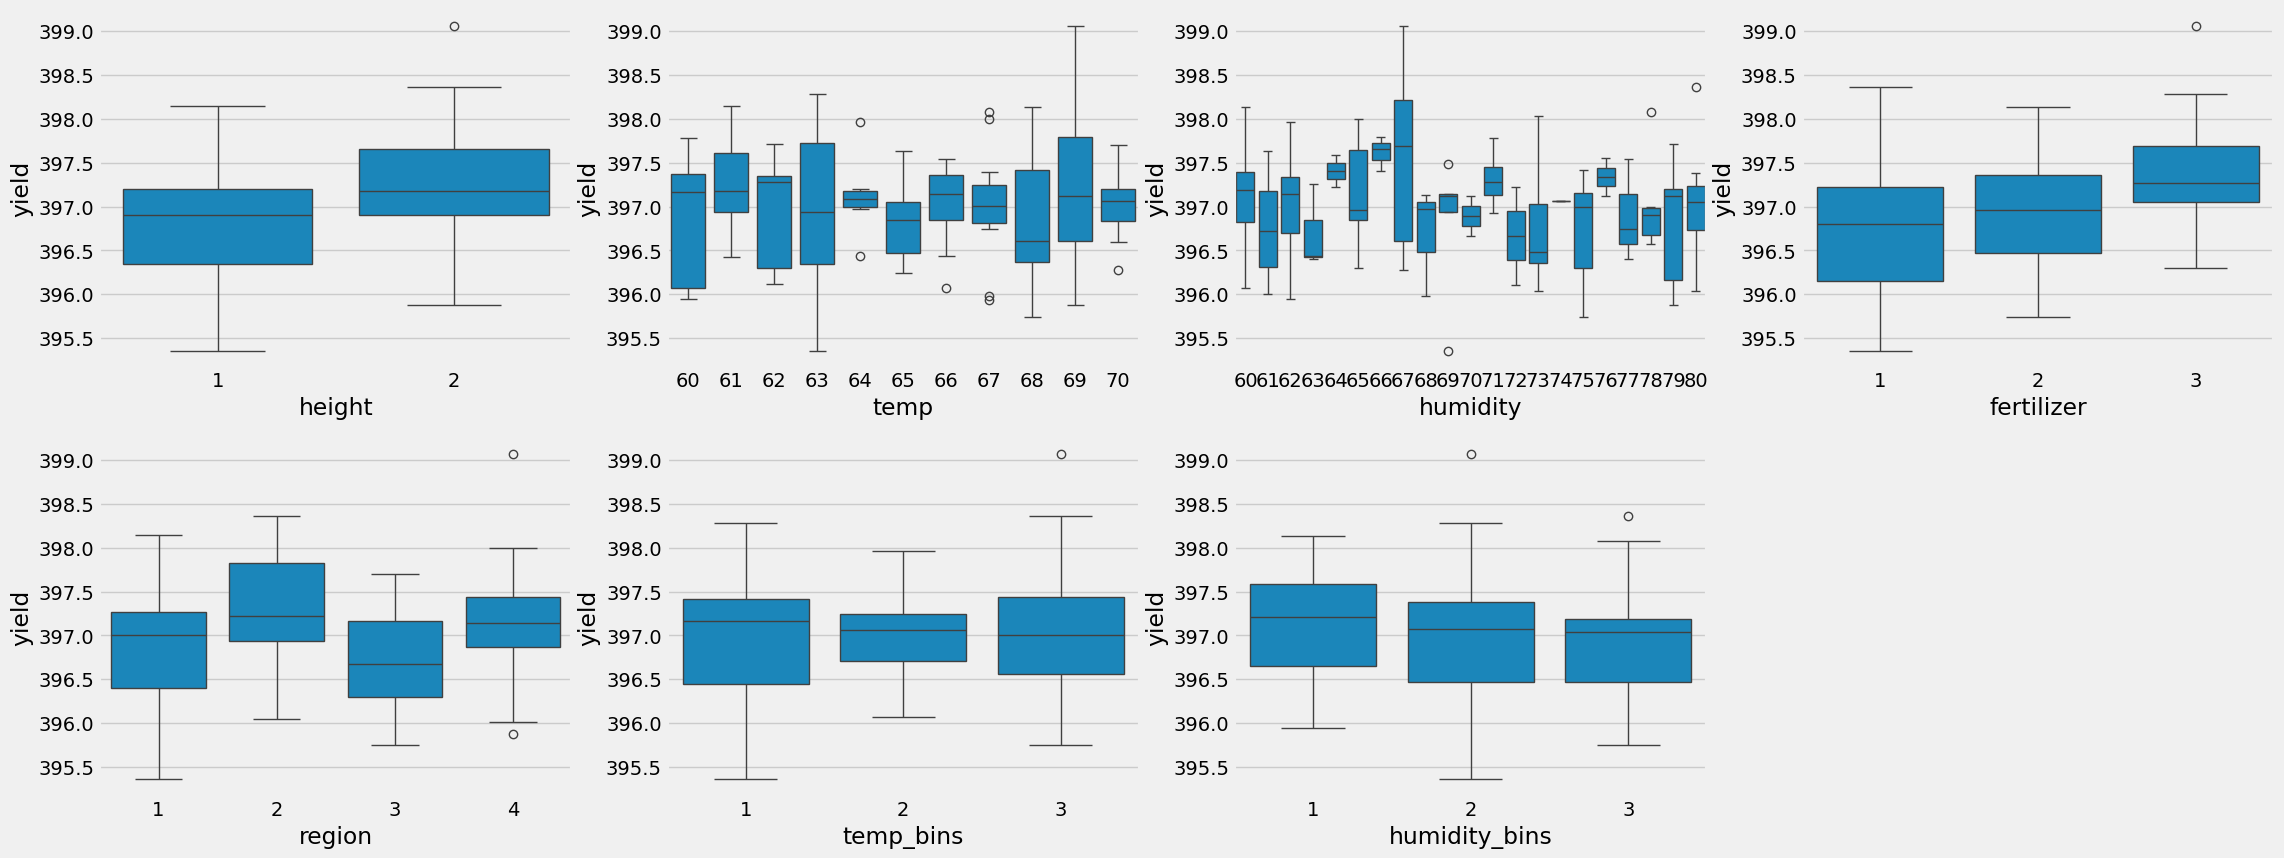

In [4]:
class SubBoxes:
    def __init__(self,data):
        self.data = data
        
    def plot(self):
        n = 1 
        fig = plt.figure(figsize=(25,15))
        for c in list(df.columns):
            if c != 'yield':
                ax = plt.subplot(3,4,n)
                sns.boxplot(data=self.data, x=c, y='yield')
                n += 1
SubBoxes(df).plot()

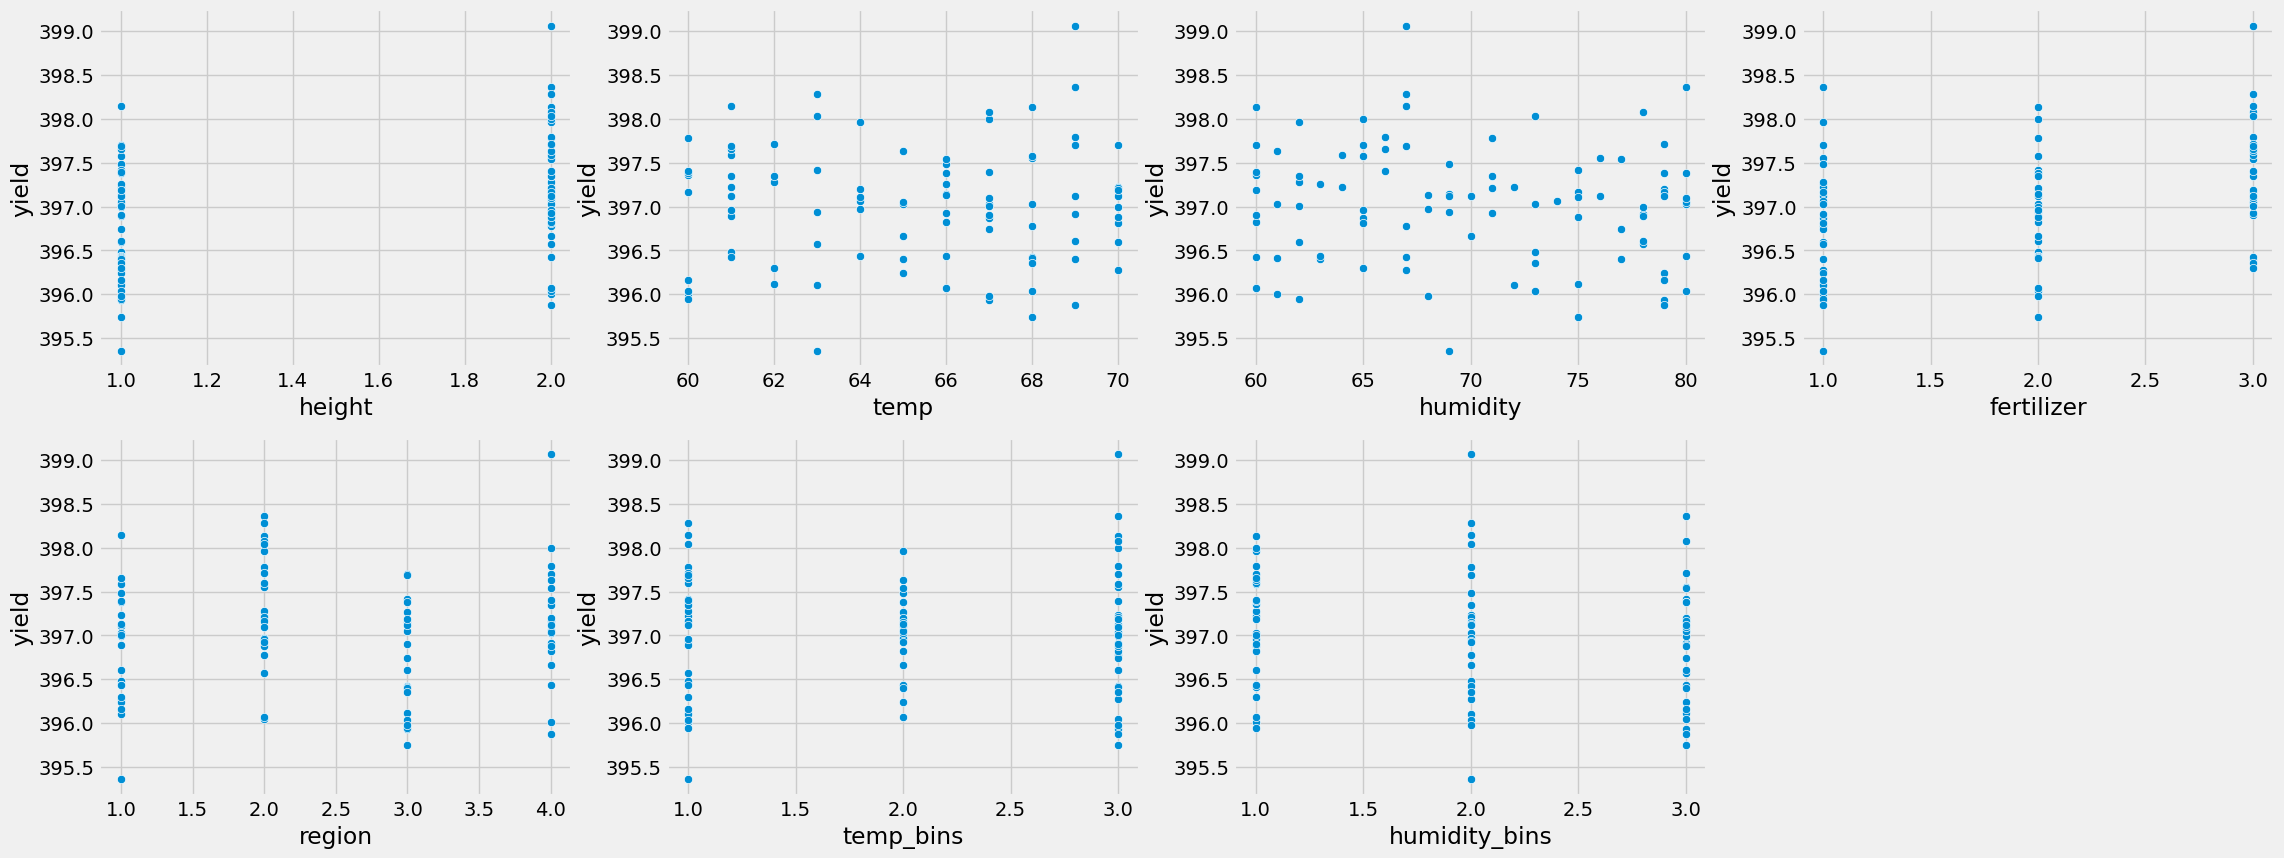

In [5]:
class SubScatter:
    def __init__(self,data):
        self.data = data
        
    def plot(self):
        n = 1 
        fig = plt.figure(figsize=(25,15))
        for c in list(df.columns):
            if c != 'yield':
                ax = plt.subplot(3,4,n)
                sns.scatterplot(data=self.data, x=c, y='yield')
                n += 1
SubScatter(df).plot()

<Axes: xlabel='yield', ylabel='Count'>

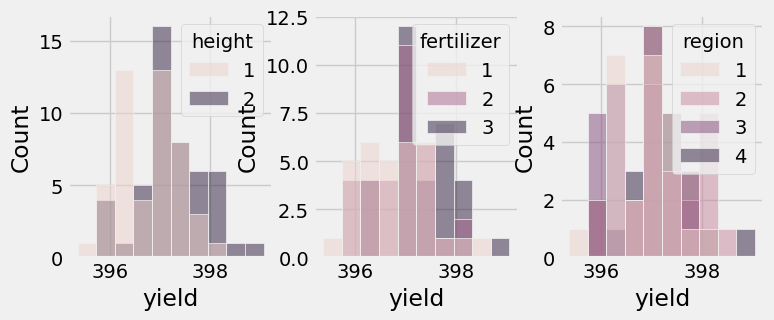

In [6]:
f, axs = plt.subplots(1, 3, figsize=(8, 3))
sns.histplot(data=df, x='yield', hue='height',ax=axs[0])
sns.histplot(data=df, x='yield', hue='fertilizer',ax=axs[1])
sns.histplot(data=df, x='yield', hue='region',ax=axs[2])

In [7]:
results = pg.anova(data=df, dv='yield', between=['temp_bins', 'humidity_bins'])
results

,Source,SS,DF,MS,F,p-unc,np2
0,temp_bins,0.007939,2.0,0.003970,0.008501,0.991535,0.000195
1,humidity_bins,0.571428,2.0,0.285714,0.611908,0.544633,0.013872
2,temp_bins * humidity_bins,0.750744,4.0,0.187686,0.401963,0.806749,0.018146
3,Residual,40.622302,87.0,0.466923,NaN,NaN,NaN


In [8]:
results = pg.anova(data=df, dv='yield', between=['height','fertilizer'])
results

,Source,SS,DF,MS,F,p-unc,np2
0,height,5.121681,1,5.121681,15.194518,0.000186,0.144442
1,fertilizer,6.068047,2,3.034023,9.001052,0.000273,0.166683
2,height * fertilizer,0.427818,2,0.213909,0.634605,0.532500,0.013906
3,Residual,30.336687,90,0.337074,NaN,NaN,NaN


In [9]:
results = pg.anova(data=df, dv='yield', between=['region'])
results

,Source,ddof1,ddof2,F,p-unc,np2
0,region,3,92,4.731503,0.004086,0.133665


In [13]:
# analogue of the t-tests for multi-comparison
def tukey_comparison(en, gr):
    tukey = pairwise_tukeyhsd(endog=en,
                               groups=gr,
                               alpha=0.05)
    tukey.plot_simultaneous()
    print(tukey.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.4605 0.0607 -0.0143  0.9353  False
     1      3  -0.1438 0.8577 -0.6185   0.331  False
     1      4   0.3196 0.2984 -0.1551  0.7944  False
     2      3  -0.6043 0.0067  -1.079 -0.1295   True
     2      4  -0.1409  0.865 -0.6156  0.3339  False
     3      4   0.4634 0.0584 -0.0114  0.9382  False
----------------------------------------------------


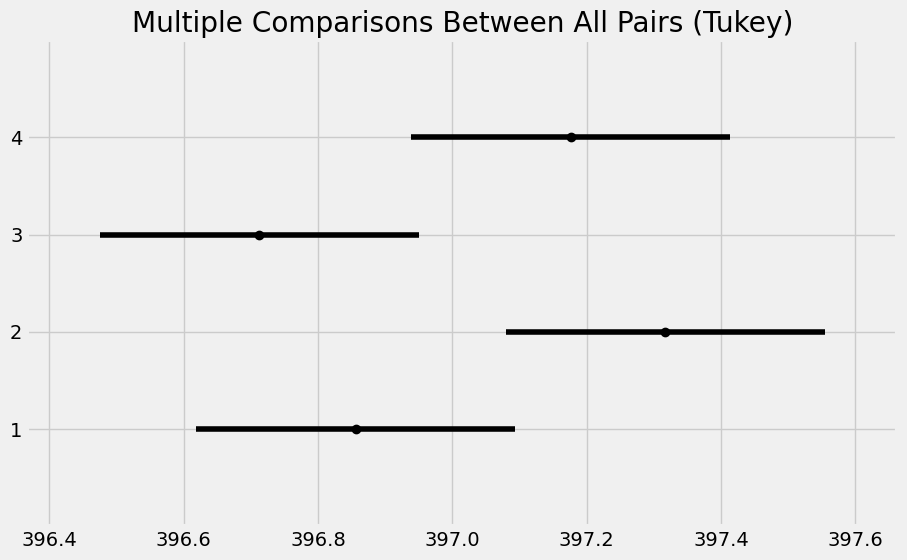

In [12]:
tukey_comparison(en=df['yield'], gr=df['region'])

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2    0.462 0.0005 0.2083 0.7157   True
--------------------------------------------------


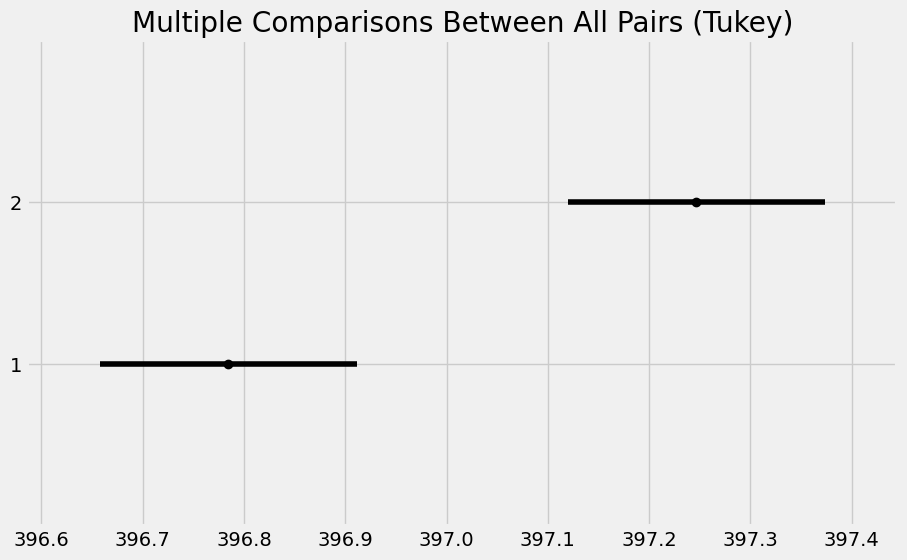

In [14]:
tukey_comparison(en=df['yield'], gr=df['height'])

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1762 0.4955 -0.1937 0.5461  False
     1      3   0.5991 0.0006  0.2292  0.969   True
     2      3    0.423 0.0209  0.0531 0.7928   True
---------------------------------------------------


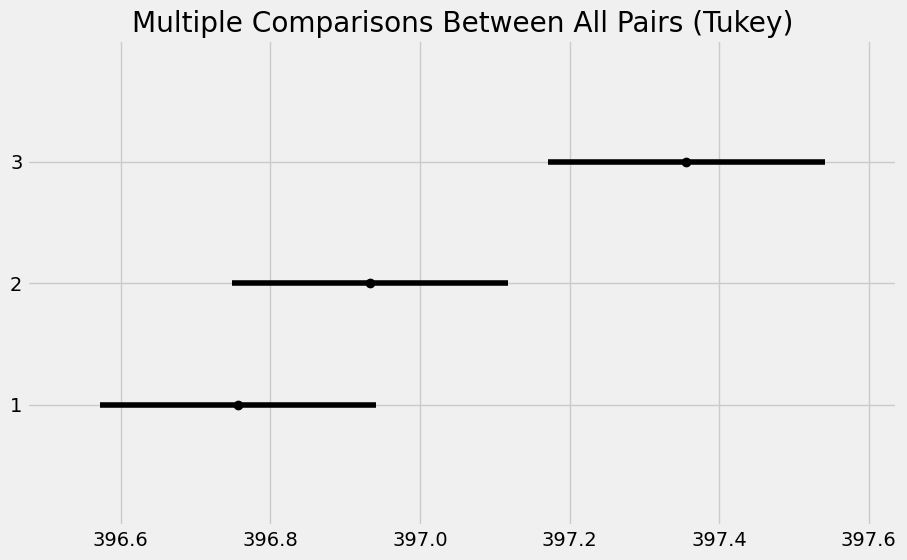

In [15]:
tukey_comparison(en=df['yield'], gr=df['fertilizer'])

Conclusion :

Only fertilizer and height have statisitcally significant differences.

Region has a difference only between region 2 and region 3.

Linear Regression

The data set is from kaggle is about heights and weights of women of ages 30 - 39

Heights and weights. (n.d.). Www.kaggle.com. https://www.kaggle.com/datasets/tmcketterick/heights-and-weights

In [18]:
data = pd.read_csv("data.csv")
data.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [19]:
data.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 372.0 bytes


In [21]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
x = data["Height"].values
x

array([1.47, 1.5 , 1.52, 1.55, 1.57, 1.6 , 1.63, 1.65, 1.68, 1.7 , 1.73,
       1.75, 1.78, 1.8 , 1.83])

In [24]:
y = data["Weight"].values
y

array([52.21, 53.12, 54.48, 55.84, 57.2 , 58.57, 59.93, 61.29, 63.11,
       64.47, 66.28, 68.1 , 69.92, 72.19, 74.46])

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

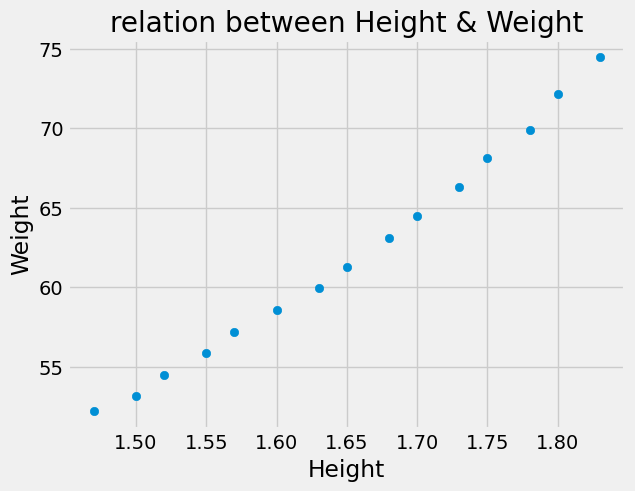

In [25]:
plt.scatter(x,y)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("relation between Height & Weight")
plt.plot

In [26]:
x = x.reshape(-1,1)
x

array([[1.47],
       [1.5 ],
       [1.52],
       [1.55],
       [1.57],
       [1.6 ],
       [1.63],
       [1.65],
       [1.68],
       [1.7 ],
       [1.73],
       [1.75],
       [1.78],
       [1.8 ],
       [1.83]])

In [27]:
Height_train, Height_test,  Weight_train, Weight_test = train_test_split(x,y, test_size=.2, train_size=.8)

In [28]:
Height_train
len(Height_train)

12

In [29]:
Height_test
len(Height_test)

3

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr_Height_Weight = LinearRegression()
lr_Height_Weight

LinearRegression()

In [32]:
lr_Height_Weight.fit(Height_train, Weight_train)

LinearRegression()

In [33]:
Weight_predicted = lr_Height_Weight.predict(Height_test)
Weight_predicted

array([57.21046131, 70.07730971, 60.88670371])

In [36]:
# regression model score
lr_Height_Weight.score(Height_test,Weight_test) * 100

98.95171951344425

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

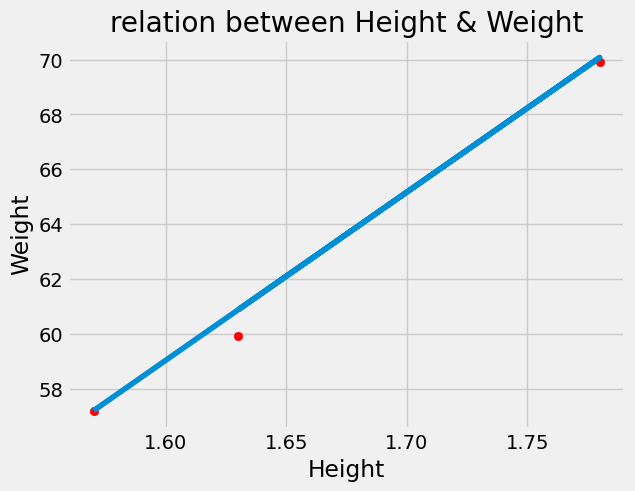

In [35]:
plt.scatter(Height_test,Weight_test,color="red")
plt.plot(Height_test, Weight_predicted)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("relation between Height & Weight")
plt.plot

Conclusion:

There is a postive correlation between Height an Weight, as the line has a postive slope.

The regession model has a score of 97.7%, indicating that it is a good fit data.

There are a few outliers in the data that do not follow the general.
